
# OpenCV Image Processing Demonstrations with Detailed Parameter Explanations and Hyperparameters

Welcome to this notebook where we will learn about various image processing techniques using OpenCV. Each section contains explanations about the techniques, the required code, detailed information about each parameter, hyperparameters that can be used for experimentation, and a Before vs After comparison to help you understand the changes made to the images.

## Topics Covered:
1. **Edge Detection** - Finding the edges in an image.
2. **Image Sharpening** - Making an image look clearer by highlighting edges.
3. **Blur Image** - Softening an image to reduce noise or detail.
4. **Image Resize** - Making an image bigger or smaller.
5. **Image Rotation** - Changing the orientation of an image.
6. **Image Augmentation** - Modifying an image by flipping it.
7. **Image Cropping** - Cutting out part of an image.
8. **Convert Image to Black and White and Negative** - Changing color representation.
9. **Face Detection** - Finding faces in an image.
10. **Identifying Facial Features** - Identifying eyes in a face.

Let's get started!


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load Image
image_path = 'couple.jpg' # Change to your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #BGR ---> RGB

# Widget to display Before vs After images
def display_before_after(before, after, title_before='Before', title_after='After'):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(before)
    axs[0].set_title(title_before)
    axs[0].axis('off')
    axs[1].imshow(after)
    axs[1].set_title(title_after)
    axs[1].axis('off')
    plt.show()


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install --upgrade opencv-contrib-python

  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\vishn\\Desktop\\projects\\aicte internship\\cg method\\AttendanceManagementSystem\\env\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [19]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [21]:
pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



## 1. Edge Detection

Edge detection is used to find the boundaries within images by detecting rapid changes in pixel intensity. We use the **Canny Edge Detection** method, which requires two threshold values to determine the edges.

- **Syntax**: `cv2.Canny(image, threshold1, threshold2)`
  - **`threshold1`**: The lower threshold for the intensity gradient. Recommended values are between `50-150`.
  - **`threshold2`**: The upper threshold for the intensity gradient. This value should be roughly double `threshold1`.
  - **Hyperparameters to Experiment With**:
    - `threshold1 = 50`, `threshold2 = 100`: Lower threshold values to include more edges.
    - `threshold1 = 100`, `threshold2 = 200`: Balanced approach for sharper edges.
    - `threshold1 = 150`, `threshold2 = 300`: Higher thresholds to capture only the most prominent edges.
  - **Why These Values**: Experimenting with threshold values helps to understand the sensitivity of edge detection. Lower values detect more edges but may also increase noise.


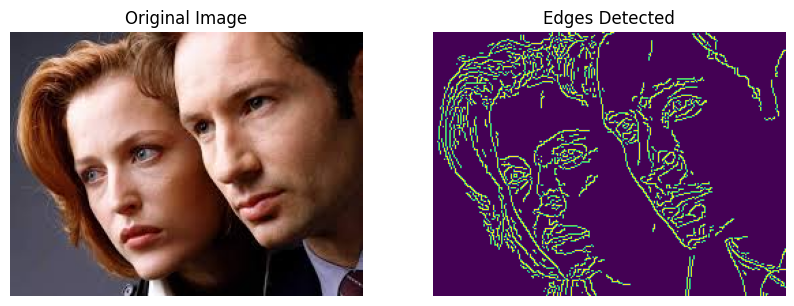

In [9]:

# Edge Detection
edges = cv2.Canny(image, 100, 150)
display_before_after(image_rgb, edges, 'Original Image', 'Edges Detected')



## 2. Image Sharpening

Image sharpening is used to enhance the edges and make the image appear more defined. We use a **kernel** (a small matrix) to process the image.

- **Kernel Used**:
  ```
  -1 -1 -1
  -1  9 -1
  -1 -1 -1
  ```
  - The center value (9) is greater than its neighbors (-1), which emphasizes the central pixel while subtracting the neighboring pixels.
- **Syntax**: `cv2.filter2D(image, ddepth, kernel)`
  - **`kernel`**: The filter kernel used to process the image.
  - **Hyperparameters to Experiment With**:
    - Increase the center value (`9`) to `11` or `13` for more aggressive sharpening.
    - Reduce the negative values (`-1`) to `-2` to emphasize the sharpening effect further.
    - Adjust kernel size to include more neighbors to see how it affects the overall image.
  - **Why These Values**: Changing the kernel's central and surrounding values directly affects the sharpness and contrast of the image.


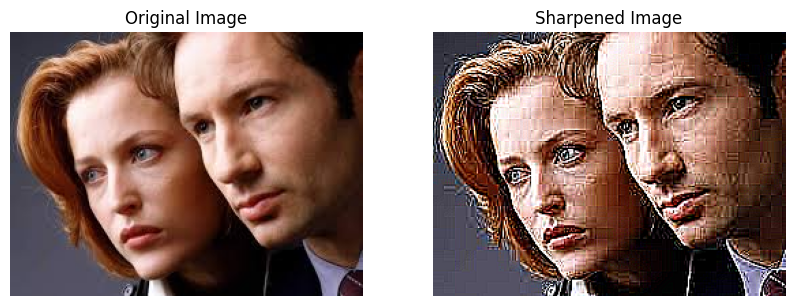

In [10]:

# Image Sharpening
kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
display_before_after(image_rgb, cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB), 'Original Image', 'Sharpened Image')


In [11]:
image.size


150738


## 3. Blur Image

Blurring helps reduce noise and detail in an image, making it appear smoother. We use a **GaussianBlur** function.

- **Syntax**: `cv2.GaussianBlur(image, (kernel_size_x, kernel_size_y), sigmaX)`
  - **`kernel_size`**: The size of the filter kernel, given as `(width, height)`. Should be odd numbers (e.g., `(15, 15)`).
  - **`sigmaX`**: Standard deviation in the X direction.
  - **Hyperparameters to Experiment With**:
    - **`kernel_size = (5, 5)`**: Smaller kernel for a minor blur effect.
    - **`kernel_size = (25, 25)`**: Larger kernel for a strong blur effect.
    - **`sigmaX = 0`**: Allows OpenCV to calculate the best value. Try setting `sigmaX = 5` or `10` to see how it affects the blur.
  - **Why These Values**: The size of the kernel and the sigma value affect how much the image is blurred and how smooth the result is.


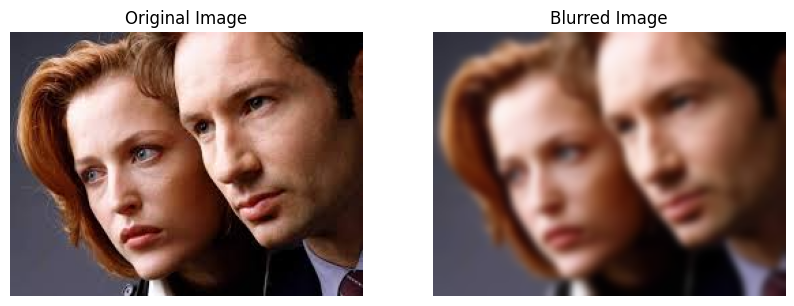

In [12]:

# Blur Image
blurred = cv2.GaussianBlur(image, (15, 15), 0)
display_before_after(image_rgb, cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB), 'Original Image', 'Blurred Image')



## 4. Image Resize

Resizing allows us to change the dimensions of an image, either scaling it up or down.

- **Syntax**: `cv2.resize(image, (width, height))`
  - **`width` and `height`**: The new dimensions of the resized image.
  - **Hyperparameters to Experiment With**:
    - **`width = original_width * 2`, `height = original_height * 2`**: Scaling up by a factor of 2.
    - **`width = original_width // 2`, `height = original_height // 2`**: Scaling down by a factor of 2.
    - **`interpolation = cv2.INTER_LINEAR`**: Use different interpolation methods such as `cv2.INTER_CUBIC` for better quality.
  - **Why These Values**: Changing interpolation methods can affect the quality of resizing, particularly for scaling up.


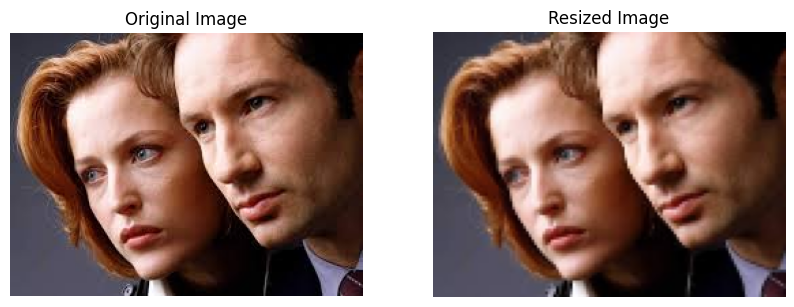

In [13]:

# Image Resize
resized = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2))
display_before_after(image_rgb, cv2.cvtColor(resized, cv2.COLOR_BGR2RGB), 'Original Image', 'Resized Image')


In [14]:
image.shape

(194, 259, 3)


## 5. Image Rotation

Rotation changes the orientation of an image. We use a **rotation matrix** to rotate the image.

- **Syntax**: `cv2.getRotationMatrix2D(center, angle, scale)`
  - **`center`**: The center point around which the image will be rotated.
  - **`angle`**: The angle of rotation in degrees. Positive values rotate counterclockwise.
  - **`scale`**: Scaling factor.
  - **Hyperparameters to Experiment With**:
    - **`angle = 90`**: Rotate the image by 90 degrees.
    - **`angle = 180`**: Rotate the image by 180 degrees.
    - **`scale = 0.5`**: Reduce the size of the image during rotation.
  - **Why These Values**: Different rotation angles and scales can be used to understand how rotating around the center affects the orientation.


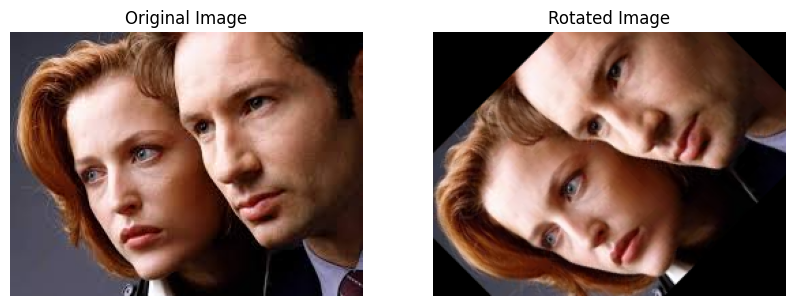

In [15]:

# Image Rotation
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
display_before_after(image_rgb, cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB), 'Original Image', 'Rotated Image')



## 9. Face Detection

Face detection involves identifying faces in an image using a pre-trained **Haar Cascade classifier**.

- **Syntax**: `face_cascade.detectMultiScale(image, scaleFactor, minNeighbors)`
  - **`scaleFactor`**: Parameter specifying how much the image size is reduced at each image scale.
  - **`minNeighbors`**: Number of neighbors each rectangle should have to retain it.
  - **Hyperparameters to Experiment With**:
    - **`scaleFactor = 1.05`**: Smaller scaling to find more faces, including smaller ones.
    - **`scaleFactor = 1.2`**: Larger scaling to detect only prominent faces.
    - **`minNeighbors = 3` or `10`**: Lower values detect more faces but may include false positives.
  - **Why These Values**: Adjusting these hyperparameters helps balance between detecting many faces and reducing false positives.


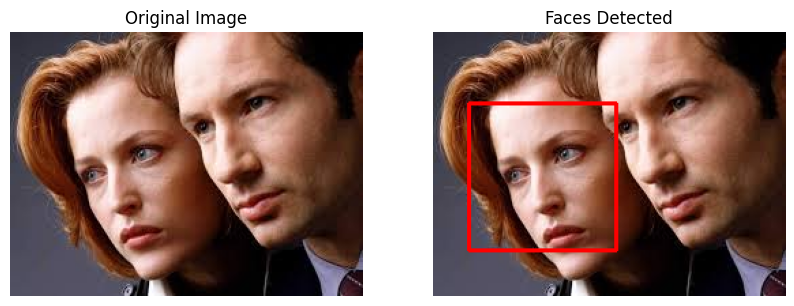

In [16]:

# Face Detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
face_detected_image = image_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(face_detected_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
display_before_after(image_rgb, face_detected_image, 'Original Image', 'Faces Detected')


In [17]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
